In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from FRCfuncs import *
from scipy.optimize import curve_fit

## FRC power Series

applied drift correction of 0.239806 nm in x and and 6.795357 nm in y.



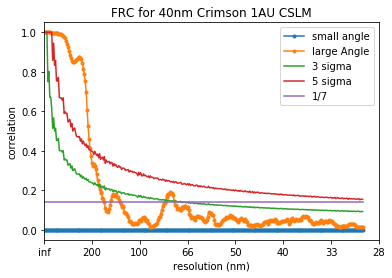

retrieved resolution for 40nm Crimson 1AU CSLM is: 159nm



In [2]:
wdir = r'N:\Singlem\singlem19-1\March\18_PowerSeries_NV'
powers = np.array([0, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100])[0:1]
Nimg = len(powers)
lFRC = np.zeros(Nimg)
sFRC = np.zeros(Nimg)
for i, power in enumerate(powers):
    fileA = os.path.join(wdir,r'CrimsonPowerSeries\{0:d}pct_imA\Red Photons\Frames_    0-    0.txt'.format(power))
    fileB = os.path.join(wdir,r'CrimsonPowerSeries\{0:d}pct_imB\Red Photons\Frames_    0-    0.txt'.format(power))
    imA, imB = readtxt(fileA, fileB)
    smallAngles, LargeAngles, threeSigma, fiveSigma, sres, lres = FRCAnalysis(imA, imB, 15, theta = 0, correctDrift = True, title = "40nm Crimson 1AU CSLM")
    lFRC[i] = lres[0,0]
    sFRC[i] = sres[0,0]
    

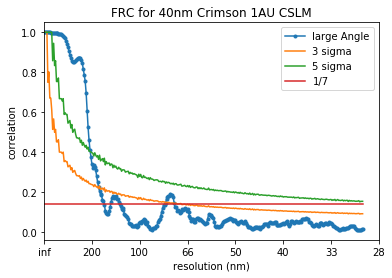

In [5]:
pltFRC(15, "40nm Crimson 1AU CSLM", threeSigma, fiveSigma, LargeAngles, [None], saveas = "GRAPH2_FRC_shows_shoulder.png")

In [22]:
def inversesqrt(x, ConfocalRes, Is):
    return ConfocalRes/(1+np.sqrt(x)/Is)

def fitSTEDpower(STEDpower, STEDresolution, p0 = (240,10)):
    return curve_fit(inversesqrt, STEDpower, STEDresolution, p0 = p0)


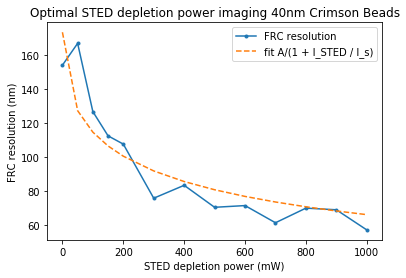

In [33]:
STEDpowers = powers*10
popt, pcov = fitSTEDpower(STEDpowers, sFRC)
fitFRC = inversesqrt(STEDpowers, popt[0], popt[1])
plt.plot(STEDpowers,sFRC, '.-', label = 'FRC resolution')
plt.plot(STEDpowers, fitFRC, '--', label = 'fit A/(1 + I_STED / I_s)')
plt.xlabel('STED depletion power (mW)')
plt.ylabel('FRC resolution (nm)')
plt.title('Optimal STED depletion power imaging 40nm Crimson Beads')
plt.legend()
plt.savefig("40nmCrimsonSTEDpowerSeriesFRC_singleFrame.png", dpi = 300)
plt.show()


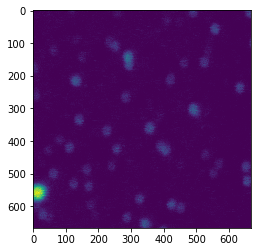

In [17]:
plt.imshow(imA)

In [13]:
def Hamming(w,h):
    alpha = 0.5
    beta = 1-alpha
    xv = alpha - beta * np.cos(2*np.pi / (w-1) * np.arange(w))
    yv = alpha - beta * np.cos(2*np.pi / (h-1) * np.arange(h))
    hamming = np.zeros([w,h])
    for i in range(h):
        hamming[i] = xv * yv[i]
    return hamming
Hm = Hamming(*imA.shape)

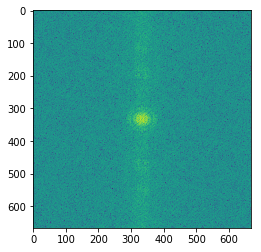

In [16]:
fftimA = np.fft.fftshift(np.fft.fft2(imA*Hm))
fftimB = np.fft.fftshift(np.fft.fft2(imB*Hm))
plt.imshow(np.log(np.abs(fftimB)))